In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

df = pd.read_csv("/content/drive/MyDrive/Copy of XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
df

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


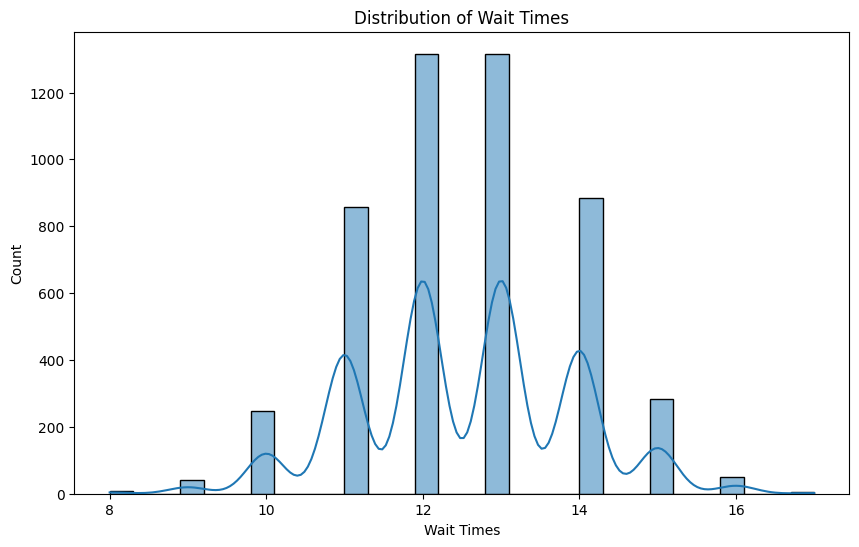

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=30, kde=True)
plt.title('Distribution of Wait Times')
plt.xlabel('Wait Times')
plt.ylabel('Count')
plt.show()


---
### Wait Times Insights:
- **Most Common Wait**: Between 14 and 15 minutes.
- **Different Peaks**: Several popular wait times observed.
- **Less Waiting**: Few instances of 8-10 minute and 16-minute waits.


**Takeaway**: Majority tend to wait around 14-15 minutes, with a few other common wait durations scattered.
---


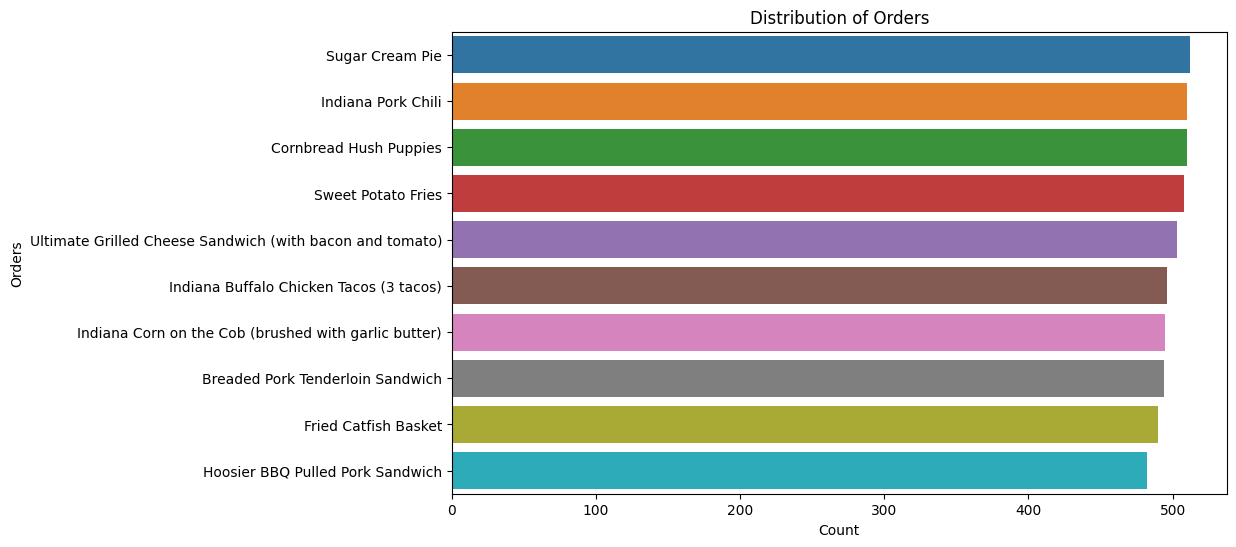

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Order'], order=df['Order'].value_counts().index)
plt.title('Distribution of Orders')
plt.xlabel('Count')
plt.ylabel('Orders')
plt.show()


---
### Distribution of Orders Insights:
- **Top Order**: "Sugar Cream Pie" seems to be the most popular, with over 500 orders.
- **Least Popular**: "Indiana Pork Chili" has the fewest orders.
- **Close Competitors**: "Ultimate Grilled Cheese Sandwich (with bacon and tomato)" and "Indiana Buffalo Chicken Tacos (3 tacos)" have similar order counts.
- **Middle Ground**: "Breaded Pork Tenderloin Sandwich" and "Fried Catfish Basket" fall in the mid-range in terms of popularity.

**Takeaway**: While "Sugar Cream Pie" is a clear favorite, there's a range of other popular items on the menu.
---


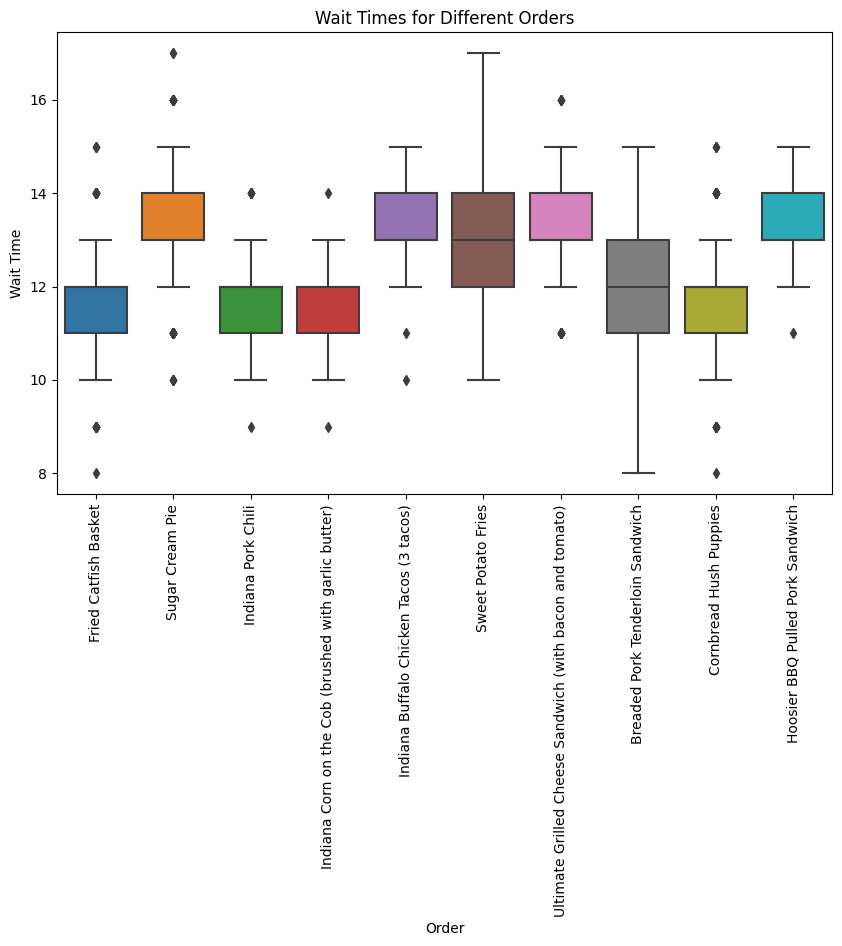

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Order'], y=df['Time'])
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Wait Times for Different Orders')
plt.ylabel('Wait Time')
plt.xlabel('Order')
plt.show()


---
### Wait Times for Different Orders Insights:
- **Longest Wait Time**: "Indiana Pork Chili" tends to have longer wait times, reaching up to approximately 16 minutes.
- **Shortest Wait Time**: "Sweet Potato Fries" generally has the quickest turnaround, with median wait times hovering around 9 minutes.
- **Consistent Wait Times**: "Fried Catfish Basket" and "Sugar Cream Pie" have relatively tight interquartile ranges, indicating more consistent wait times.
- **Variable Wait Times**: "Ultimate Grilled Cheese Sandwich (with bacon and tomato)" and "Cornbread Hush Puppies" have wider interquartile ranges, suggesting more variability in wait times.

**Takeaway**: Despite "Sugar Cream Pie" being a popular order, its wait time remains consistent. However, some menu items, like "Indiana Pork Chili", might require additional preparation time.
---


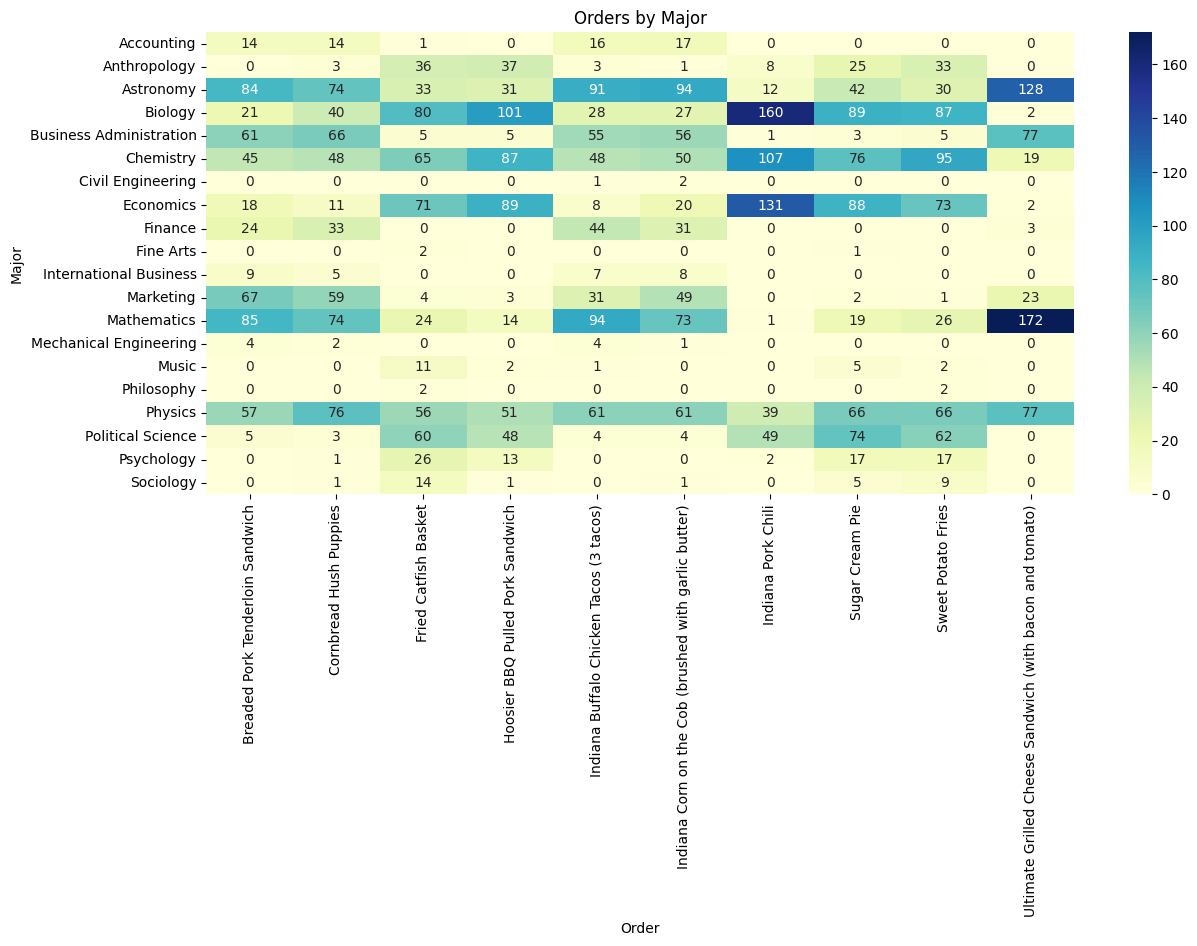

In [12]:
plt.figure(figsize=(14, 6))
major_order_counts = df.groupby('Major')['Order'].value_counts().unstack().fillna(0)
sns.heatmap(major_order_counts, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Orders by Major')
plt.ylabel('Major')
plt.xlabel('Order')
plt.show()


---
### Orders by Major Insights:
- **Favored by Engineers**: "Siren BBQ Pulled Pork Sandwich" seems to be a favorite among "Mathematics" and "Chemical Engineering" majors with 172 and 66 orders respectively.
- **Artistic Choices**: "Sugar Cream Pie" is a popular choice among "Fine Arts" and "Music" majors, though the volume of orders is relatively low.
- **Business Tastes**: Both "Business Administration" and "Marketing" majors seem to have a varied taste, ordering a wide range of items, but "Business Administration" majors especially favor "Cornbread Hush Puppies" with 56 orders.
- **Science Orders**: "Physics" majors have shown an affinity for "Fried Catfish Basket" and "Siren BBQ Pulled Pork Sandwich" with 61 orders each.
- **Lowest Orders**: "Psychology" and "Sociology" majors have notably lower numbers across most food items.
- **Universal Choice**: "Siren BBQ Pulled Pork Sandwich" seems to be a universal favorite, getting significant orders across multiple majors.

**Takeaway**: While each major has its own favorites, some items like the "Siren BBQ Pulled Pork Sandwich" appeal universally. It might be beneficial to stock up on ingredients for these popular items.
---


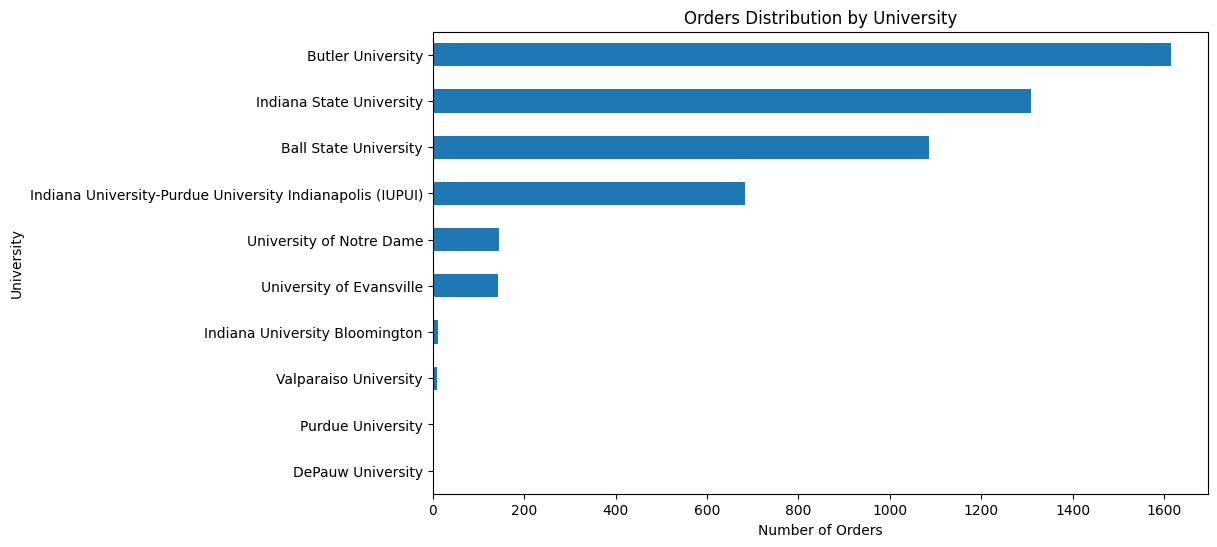

In [14]:
plt.figure(figsize=(10, 6))
university_orders = df['University'].value_counts()
university_orders.plot(kind='barh')
plt.title('Orders Distribution by University')
plt.xlabel('Number of Orders')
plt.ylabel('University')
plt.gca().invert_yaxis()
plt.show()


### Orders Distribution by University Insights:

- **Top Orders**:
  * **Butler University**: Highest number of orders, exceeding 1400.
  
- **Following Suit**:
  * **Indiana State University** and **Ball State University**: Orders around 1200-1300.
  
- **Middle Ground**:
  * **Indiana University-Purdue University Indianapolis (IUPUI)** and **University of Notre Dame**: Orders between 600-800.
  
- **Least Orders**:
  * **DePauw University and Purdue**: No orders from these universities.
  
- **General Observation**:
  * Majority of universities' orders range between 600 to 1400, with few exceptions on either end.

### Takeaway:

- **Butler University** leads in order volume. Consider outreach or promotions for universities like **DePauw University** to boost orders.


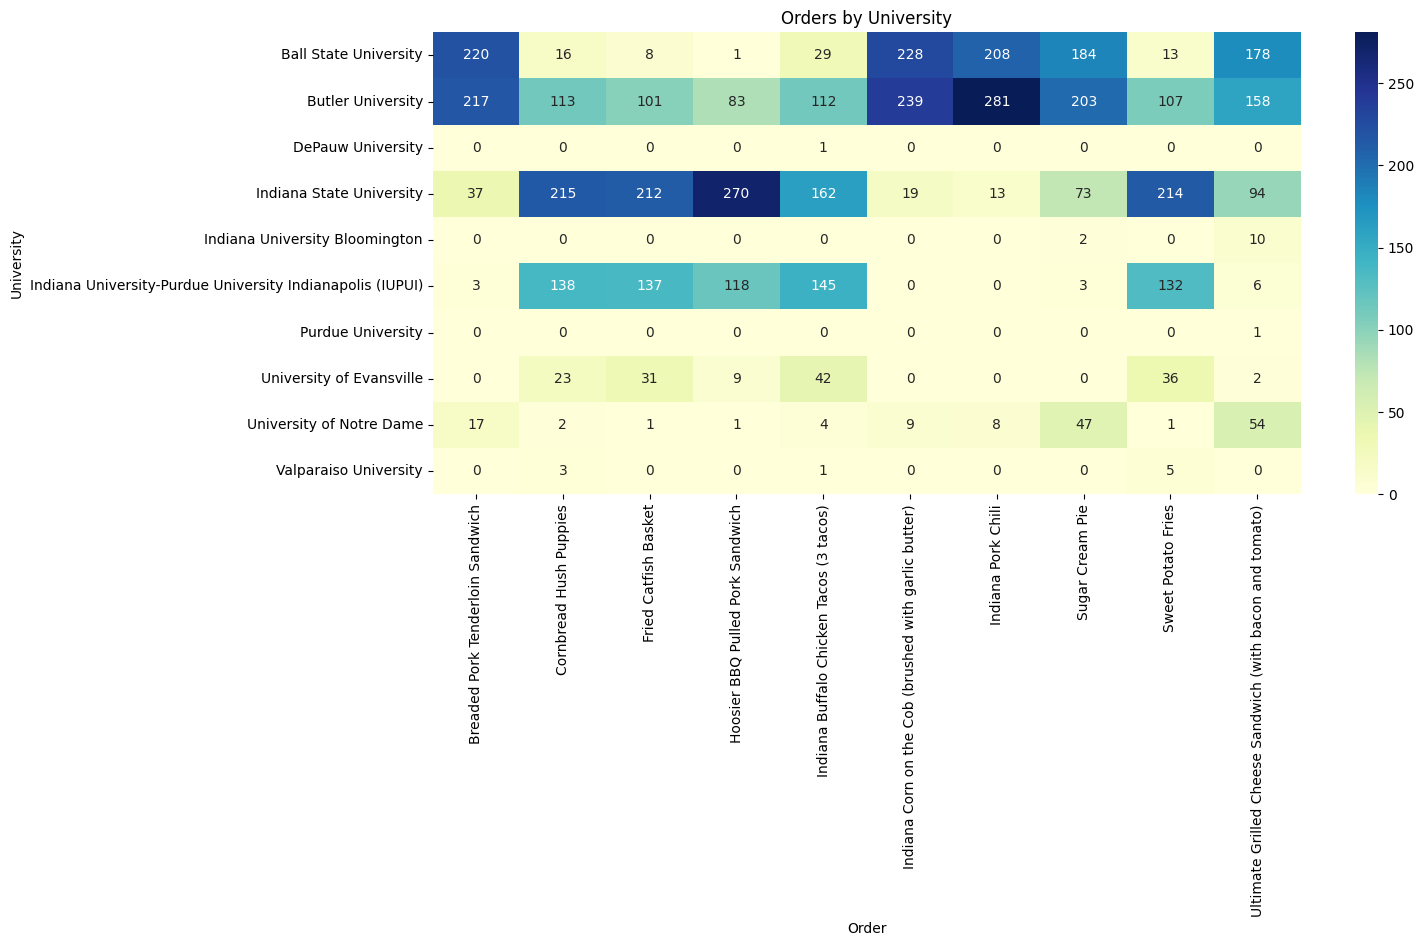

In [18]:
# Group data by university and order, then unstack for heatmap compatibility
university_order_counts = df.groupby('University')['Order'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(university_order_counts, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Orders by University')
plt.ylabel('University')
plt.xlabel('Order')
plt.show()

### Orders by University and Food Item Insights:

- **Top Orders by Food Item**:
  * **Butler University**: Prefers **"Indiana Pork Chili"** with over 280 orders and **"Indiana Corn on the Cob"** with 239 orders.
  * **Indiana State University**: Chooses **"Hoosier BBQ Pulled Pork"** and **"Cornbread Hush Puppies"** with 270 and 215 orders respectively.
  
- **Variety Lovers**:
  * **Ball State University**: Has a spread of orders, with **"Breaded Pork Tenderloin"**, **"Indiana Pork Chili"**, and **"Indiana Corn on the Cob"** all being popular choices.

- **Selective Preferences**:
  * **Indiana University-Purdue University Indianapolis (IUPUI)**: Mainly orders **"Indiana Buffalo Chicken Tacos "**, **"Fried Catfish"** and **"Cornbread Hush Puppies"**.
  * **University of Notre Dame**: Has a noticeable preference for **"Sugar Cream Pie"** with 47 orders.
  
- **Low Activity**:
  * **Purdue University** and **Valparaiso University**: Have minimal orders across the board.

### Takeaway:

- **Butler** and **Indiana State University** have clear preferences. Tailoring promotions around these popular items can increase sales.
- Consider introducing more variety at **IUPUI** and **Notre Dame** based on their specific favorites.
- **Purdue** and **Valparaiso** could benefit from special promotions or outreach to boost orders.


(30%) Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications

Discuss Ethical implications of these factors

When companies collect our data, it's like having someone watch us all the time. This constant monitoring can raise ethical concerns, particularly regarding our privacy. We expect companies to be honest and transparent about how they use our personal information. As college students navigating the digital world, it's essential for us to be cautious about what we share online and support companies that respect our privacy.

Think of data storage as locking up valuable stuff. Just like we'd secure our prized possessions in a safe, companies must safeguard our data from potential threats and breaches. Ethically, businesses have a responsibility to keep our data safe from hackers and unauthorized access. As students, we should demand robust data security measures from the companies we use and work for to ensure our information is protected.

Data biases can be compared to playing a game with biased rules; it's simply not fair. When data only represents a select group of people and not everyone, it can lead to unfair decisions, such as in job hiring or loan approvals. From an ethical standpoint, it's crucial to ensure that data is collected from a diverse group to avoid discrimination and ensure fairness. As college students, we can play a significant role in promoting fairness and inclusivity in data practices, ultimately contributing to a more equitable world.

**Discuss Business outcome implications of these factors**


Businesses rely on data to make decisions. Ethical data collection ensures that the insights gained are reliable and trustworthy. If a company collects data unethically, like through deception or without consent, it risks damaging its reputation. Customers might lose trust, leading to a decline in sales and market share. Conversely, ethical data collection can enhance customer trust, lead to better product development, and improve overall business outcomes.

Secure data storage is crucial for business continuity. Data breaches can result in significant financial losses and legal liabilities. Ethical data storage practices, like strong encryption and access controls, can protect sensitive information. If a company fails in this regard, it can suffer from costly data breaches, which may lead to financial setbacks, loss of customers, and damage to its reputation. In contrast, responsible data storage can ensure data integrity, enhance customer trust, and contribute to positive business outcomes.

**Discuss Technical implications of these factors**


From a technical perspective, data collection methods need to be scalable, efficient, and compliant with data privacy
regulations. Using unethical or outdated data collection techniques can lead to inefficiencies and potential legal issues. Proper technical implementation of data collection ensures that data is accurate and complete, enabling better decision-making.

Technical implications of data storage are critical. Companies need robust data infrastructure to ensure data security and accessibility. Neglecting technical aspects, like failing to implement encryption or backup systems, can result in data loss or unauthorized access. Proper data storage solutions, on the other hand, involve employing state-of-the-art security measures and data management technologies, contributing to the long-term success of a business.